In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data_dir = Path('../data').resolve()
data_dir.exists()

True

In [9]:
df = pd.read_csv(data_dir/'train.csv', index_col='Id')

# data section of interest
df = df[df['MSZoning'] == 'RL']
df = df[df['SaleCondition'] == 'Normal']

# target normalization
df['SalePrice'] = df['SalePrice'].apply(np.log)

# input variables
input_variables = ['LotArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd', 'GarageCars']
df = df[input_variables + ['SalePrice', ]]

df.head()

,LotArea,OverallQual,YearBuilt,TotRmsAbvGrd,GarageCars,SalePrice
Id,,,,,,
1,8450,7,2003,8,2,12.247694
2,9600,6,1976,6,2,12.109011
3,11250,7,2001,6,2,12.317167
5,14260,8,2000,9,3,12.429216
6,14115,5,1993,5,2,11.870600


# Input Variable Distributions

## Lot Area

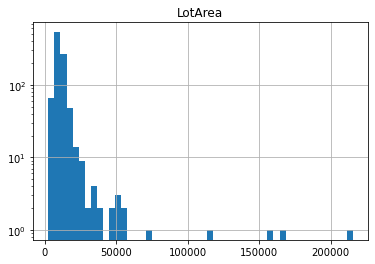

In [3]:
ax = df['LotArea'].hist(bins=50)

ax.set_title('LotArea')

plt.yscale('log')

plt.show()

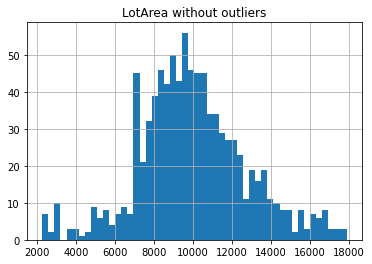

In [23]:
df = df[df['LotArea'] <= df['LotArea'].quantile(0.95)]

ax = df['LotArea'].hist(bins=50)

ax.set_title('LotArea without outliers')

plt.show()

In [24]:
df['LotArea'].describe()

count      907.000000
mean      9986.392503
std       2767.060389
min       2268.000000
25%       8304.000000
50%       9760.000000
75%      11592.000000
max      17871.000000
Name: LotArea, dtype: float64

## Overall Quality

1-10 grading.

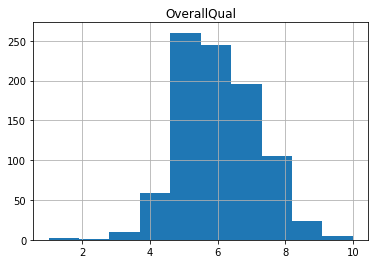

In [25]:
ax = df['OverallQual'].hist(bins=10)

ax.set_title('OverallQual')

plt.show()

In [26]:
df['OverallQual'].describe()

count    907.000000
mean       6.083793
std        1.311198
min        1.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       10.000000
Name: OverallQual, dtype: float64

## YearBuilt

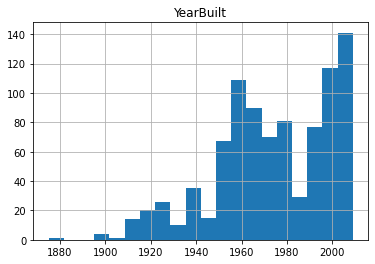

In [27]:
ax = df['YearBuilt'].hist(bins=20)

ax.set_title('YearBuilt')

plt.show()

In [28]:
df['YearBuilt'].describe()

count     907.00000
mean     1973.62183
std        25.54832
min      1875.00000
25%      1958.00000
50%      1974.00000
75%      1998.00000
max      2009.00000
Name: YearBuilt, dtype: float64

## TotRmsAbvGrd

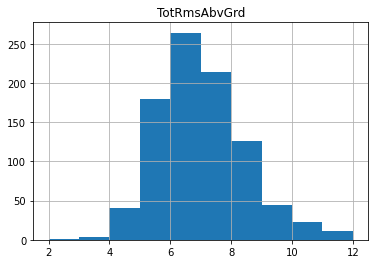

In [29]:
ax = df['TotRmsAbvGrd'].hist(bins=10)

ax.set_title('TotRmsAbvGrd')

plt.show()

In [30]:
df['TotRmsAbvGrd'].describe()

count    907.000000
mean       6.528115
std        1.463324
min        2.000000
25%        6.000000
50%        6.000000
75%        7.000000
max       12.000000
Name: TotRmsAbvGrd, dtype: float64

## GarageCars

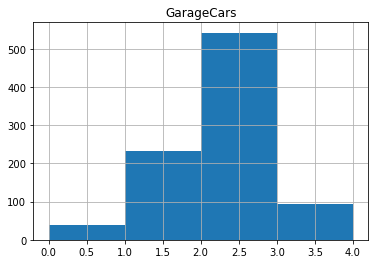

In [31]:
ax = df['GarageCars'].hist(bins=4)

ax.set_title('GarageCars')

plt.show()

In [32]:
df['GarageCars'].describe()

count    907.000000
mean       1.761852
std        0.694157
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: GarageCars, dtype: float64

# Dispersion

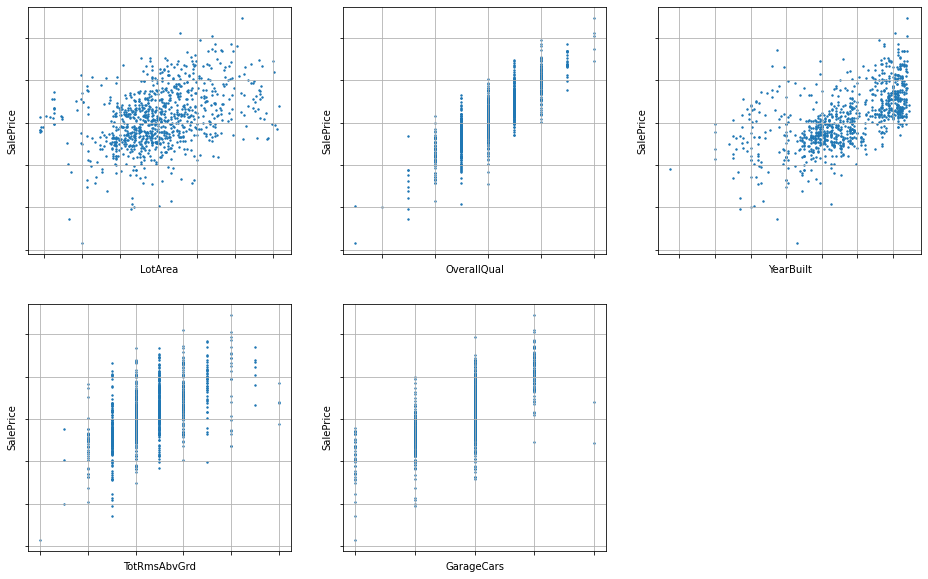

In [33]:
fig, axs = plt.subplots(2, 3)
axs = axs.flatten()

fig.set_size_inches(16,10)

for ax, var in zip(axs, input_variables):
    ax.scatter(df[var], df['SalePrice'], s=2)
    
    ax.grid()
    ax.set_xlabel(var)
    ax.set_ylabel('SalePrice')
    ax.set_xticklabels([])
    ax.set_yticklabels([])

axs[-1].set_axis_off()

plt.show()

Since `LotArea` doesn't seem to have a linear relation to our target variable, we are not taking it any further.